In [1]:
#INTRODUÇÃO

#Esse notebook tem como objetivo demonstrar conhecimento em análise exploratória de dados por meio da linguagem Python e algumas
#de suas bibliotecas (Pandas e Pyplot).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#Criando o Dataframe importando uma base de dados
df = pd.read_excel('https://github.com/vitorluchetta/dbAdventureWorks/blob/main/dbAdventureWorks.xlsx?raw=true')


In [3]:
#Verificando a estrutura de dados: colunas, linhas, tipos de dados, valores nulos.
df.info()

#Nesse caso, a base de dados está com uma boa estrutura para realizar a análise, faltando apenas ajustes de tipo, 
#que será feito na célular a seguir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [4]:
#TRATAMENTO DE TIPOS DE DADOS#

#Convertendo tipo dos dados de ID de int para object(string)
df['ID Produto'] = df['ID Produto'].astype(str)
df['ID Loja'] = df['ID Loja'].astype(str)
df['ID Cliente'] = df['ID Cliente'].astype(str)

#Com essa conversão é possivel entender os campos acima como campos categóricos, apesar de conterem apenas numeros.

In [5]:
#Verificando informações de estátisticas descritivas, quantidade, média, desvio padrão, minimo, quartis e valores máximos.
df.describe()

# Com essa análise é possivel verificar se há alguma discrepância ou inconsistência nos dados, como por exemplo: outliers, 
# valores faltantes e valores negativos.

,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000
mean,272.006150,742.527965,62.950221,689.123294,6620.139538
std,129.765051,368.589889,148.945964,822.363117,4319.407257
min,5.090000,9.990000,2.000000,0.000000,159.840000
25%,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [6]:
#ENRIQUECIMENTO DE DADOS#

df['Custo Total'] = df['Custo Unitário'] * df['Quantidade']
df['Lucro'] = df['Valor Venda'] - df['Custo Total']
df['% Lucro'] = round((df['Custo Total'] / df['Valor Venda']) * 100,2)
df['% Desconto'] = round((df['Valor Desconto'] / df['Valor Venda']) * 100,2)
df['Dias Envio'] = df['Data Envio'] - df['Data Venda']

#Nesta etapa são usados dados que já existem no dataframe para gerar outros dados que podem ser relevantes para a análise

In [7]:
#Buscando o valor minimo para a Data Venda (data inicial das vendas)
dataInicio = df['Data Venda'].min()

#Convertendo o formato de data em padrão brasileiro, somente a data e mantendo o tipo do campo datetime no dataframe
dataInicio = datetime.strftime(dataInicio, '%d/%m/%Y')

#Buscando o valor máximo para a Data Venda (data final das vendas)
dataFim = df['Data Venda'].max()

#Convertendo o formato de data em padrão brasileiro, somente a data e mantendo o tipo do campo datetime no dataframe
dataFim = datetime.strftime(dataFim, '%d/%m/%Y')

#Somando os campos para buscar os totais indicados nas variáveis
totalQuantidade = df['Quantidade'].sum()
faturamento = df['Valor Venda'].sum()
custoTotal = df['Custo Unitário'].sum()

#Calculando qual o lucro total baseado nas variáveis adquiridas anteriormente
lucroTotal = faturamento - custoTotal

#Verificando a quantidade de lojas
qtdLojas = df['ID Loja'].nunique()

#Verificando a quantidade de produtos
varProduto = df['ID Produto'].nunique()

#Verificando média de desconto
percDesconto  = df['% Desconto'].mean()

#Verificando média de lucro
percLucro = df['% Lucro'].mean()


#Mostrando em tela um resumo inicial de informações
print('_* RESUMO DE INFORMAÇÕES *_\n')
print(f'Inicio do periodo de vendas:           {dataInicio}')
print(f'Final do periodo de vendas:            {dataFim}')
print(f'Quantidade de lojas:                   {qtdLojas}' )
print(f'Variedade de produto:                  {varProduto}' )
print(f'% Médio de lucro do periodo:           {round(percLucro)}%')
print(f'% Médio de desconto na venda:          {round(percDesconto)}%')
print(f'Quantidade total de produtos vendidos: {totalQuantidade}')

#Mostrando em tela com formatação de dados, usando mascaras para dinheiro, tipo float com duas casas decimais
print(f'Faturamento ao fim do periodo (R$):    {faturamento:,.2f}')
print(f'Custo total ao fim do periodo (R$):    {custoTotal:,.2f}')
print(f'Lucro total ao fim do periodo (R$):    {lucroTotal:,.2f}')


_* RESUMO DE INFORMAÇÕES *_

Inicio do periodo de vendas:           02/01/2008
Final do periodo de vendas:            31/12/2009
Quantidade de lojas:                   3
Variedade de produto:                  9
% Médio de lucro do periodo:           45%
% Médio de desconto na venda:          11%
Quantidade total de produtos vendidos: 56907
Faturamento ao fim do periodo (R$):    5,984,606.14
Custo total ao fim do periodo (R$):    245,893.56
Lucro total ao fim do periodo (R$):    5,738,712.58


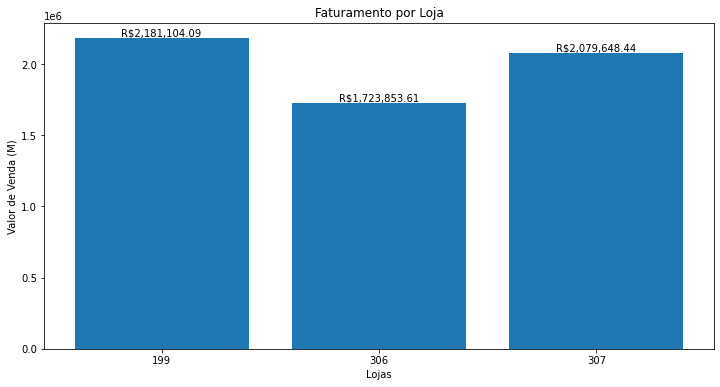

In [8]:
#Somando valores de venda para cada loja
vendaPorLoja = df.groupby('ID Loja')['Valor Venda'].sum()

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Criando o gráfico de barras
ax.bar(vendaPorLoja.index, vendaPorLoja.values)

# Define os valores do eixo X como os índices do faturamento
ax.set_xticks(vendaPorLoja.index)

# Definindo o título e rótulos dos eixos
ax.set_xlabel('Lojas')
ax.set_ylabel('Valor de Venda (M)')
ax.set_title('Faturamento por Loja')

# Adicionando os valores de faturamento acima de cada barra
for i, v in enumerate(vendaPorLoja.values):
    ax.text(i, v, 'R${:,.2f}'.format(v), ha='center', va='bottom')

# Exibindo o gráfico   
plt.show()


#É possivel verificar que a a loja '199' e a '307' tiveram faturamentos muito parecidos, seguidos pela loja 306 que teve um
# desempenho pior. A partir dessa informação, existe a possibilidade de verificar quais fatores levam a loja '306' a vender
# menos, buscando equiparar os números.

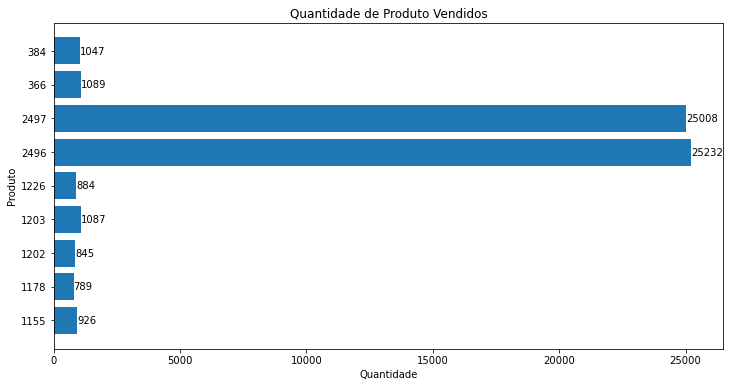

In [9]:
#Somando as quantidade produtos vendidos
qntdProduto = df.groupby('ID Produto')['Quantidade'].sum()

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Criando o gráfico de barras horizontais
ax.barh(qntdProduto.index, qntdProduto.values)

# Define os valores do eixo Y como os índices da quantidade
ax.set_yticks(qntdProduto.index)

# Definindo o título e rótulos dos eixos
ax.set_ylabel('Produto')
ax.set_xlabel('Quantidade')
ax.set_title('Quantidade de Produto Vendidos')

# Adicionando os valores de faturamento acima de cada barra
for i, v in enumerate(qntdProduto.values):
    ax.text(v, i, str(v), ha='left', va='center')
    
# Exibindo o gráfico  
plt.show()


#Essa análise gráfica nos mostra que os produtos '2497' e '2496' vendem cerca de 25 vezes mais que os outros disponiveis.

#Com essa informação, o entendimento das vendas se torna mais claro, possibilitando insights para melhorar o portifólio 
# de produtos, buscando entender melhor o que público alvo busca na plataforma de vendas.


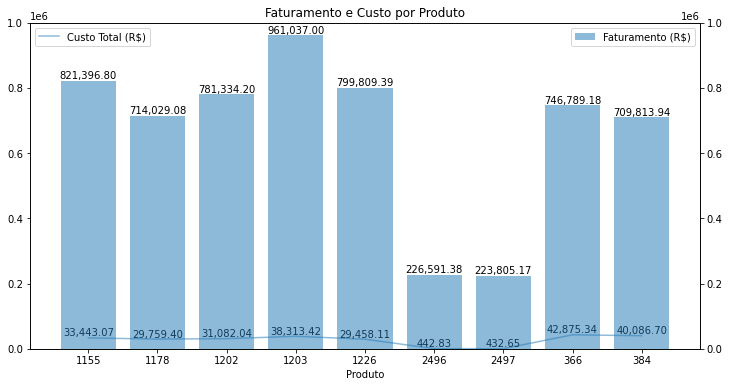

In [10]:
# Somando valores de venda e custo por produto
vendaProdTotal = df.groupby('ID Produto')['Valor Venda'].sum()
custoProdTotal = df.groupby('ID Produto')['Custo Unitário'].sum()

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Criando o gráfico de linhas
ax.plot(custoProdTotal.index, custoProdTotal.values, alpha=0.5, label='Custo Total (R$)')

# Define os valores do eixo X como os índices dos custos
ax.set_xticks(custoProdTotal.index)

# Definindo o título e rótulos dos eixos
ax.set_xlabel('Produto')
ax.set_title('Faturamento e Custo por Produto')

# Aloca a legenda de custo no canto superior esquerdo
ax.legend(loc='upper left')

# Definindo a escala
ax.set_ylim([0, 1000000])


# Cria um segundo eixo Y compartilhando o mesmo eixo X do primeiro
ax2 = ax.twinx()

#Criando o gráfico de barras
ax2.bar(vendaProdTotal.index, vendaProdTotal.values, alpha=0.5, label='Faturamento (R$)')

# Aloca a legenda de custo no canto superior direito
ax2.legend(loc='upper right')

# Definindo a escala
ax2.set_ylim([0, 1000000])

# Adicionando os valores de faturamento acima de cada linha
for i, v in enumerate(custoProdTotal.values):
    ax.text(i, v, '{:,.2f}'.format(v), ha='center', va='bottom')

# Adicionando os valores de faturamento acima de cada barra
for i, v in enumerate(vendaProdTotal.values):
    ax2.text(i, v, '{:,.2f}'.format(v), ha='center', va='bottom')
    
# Exibindo o gráfico
plt.show()


# É possivel visualizar analisando tambem o gráfico anterior, que apesar dos produtos '2496' e '2497' tiveram um número 
# de vendas cerca de 25 vezes maior, todos os outros produtos tiveram um resultado melhor e que a margem de lucro dos produtos
# é muito alta, trazendo resultado extremamente satisfatórios.

# Com esses insigts é possivel desenvolver estratégias de vendas mais efetivas para remodelar os produtos com baixo desempenho


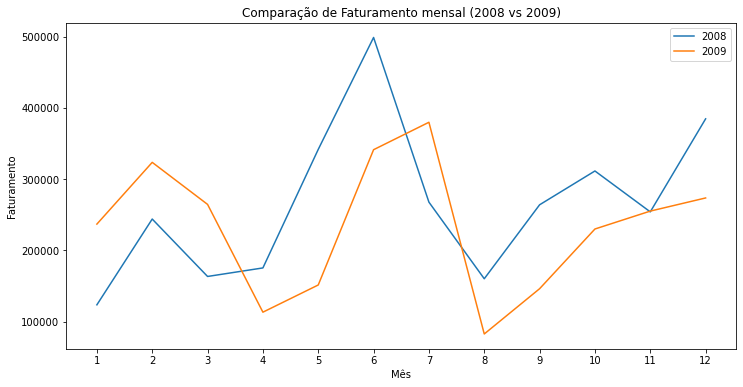

In [11]:
# Filtrando os dados de 2008 e 2009
dfAno = df[(df['Data Venda'].dt.year == 2008) | (df['Data Venda'].dt.year == 2009)]

# Agrupando por mês e calculando a soma das vendas
vendasMensais = dfAno.groupby([df['Data Venda'].dt.year, dfAno['Data Venda'].dt.month])['Valor Venda'].sum()

# Reindexando o DataFrame para incluir todos os meses de janeiro a dezembro
vendasMensais = vendasMensais.reindex(range(1, 13), level=1)

# Criando o gráfico de linhas
fig, ax = plt.subplots(figsize=(12, 6))

# Criando o gráfico de linhas para os anos de 2008 e 2009
ax.plot(vendasMensais[2008].index, vendasMensais[2008].values, label='2008')
ax.plot(vendasMensais[2009].index, vendasMensais[2009].values, label='2009')

# Definindo o título e rótulos dos eixos
ax.set_title('Comparação de Faturamento mensal (2008 vs 2009)')
ax.set_xlabel('Mês')
ax.set_ylabel('Faturamento')

# Define os valores do eixo X como os índices do faturamento
ax.set_xticks(range(1, 13))

# Adicionando a legenda
ax.legend()

# Exibindo o gráfico
plt.show()

#O faturamento do ano de 2009 até o mês de março, foi maior que o ano anterior, tendo um pico também no mês julho.
#Porém, até o final do periodo o ano de 2008 teve um desempenho melhor.

#Com essas informações é possivel buscar a compreensão do porque esses periodos tiveram a variação nas vendas e buscando 
# melhores estratégias de venda para cada periodo.

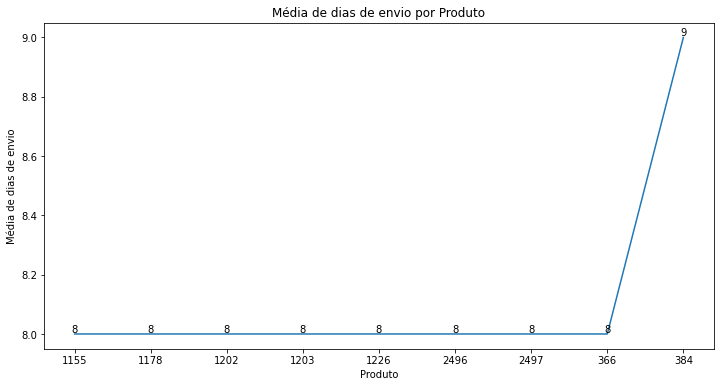

In [12]:
# Calculando a média dos dias de envio por produto
mediaDiasEnvio = df.groupby('ID Produto')['Dias Envio'].mean()

# Criando o gráfico de linhas
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando a série da média de dias de envio por produto
ax.plot(mediaDiasEnvio.index, mediaDiasEnvio.dt.days)


# Adicionando os valores das médias de dias de envio em cima das linhas do gráfico
for i, v in enumerate(mediaDiasEnvio.dt.days):
    ax.text(i, v, v, ha='center', va='bottom')
    
# Definindo o título e rótulos dos eixos
ax.set_title('Média de dias de envio por Produto')
ax.set_xlabel('Produto')
ax.set_ylabel('Média de dias de envio')

# Exibindo o gráfico
plt.show()

In [13]:
#É possivel visualizar que a média de dias para o envio dos produtos são de 8 dias, porém no item 384 é de 9 dias.
#Além da média de envio ser maior, é possivel visualizar um outlier (20 dias) que muito contribui para o aumento dessa média.

#Verificando os dados é possivel analisar se a média de dias de envio está sendo satisfatória, buscando melhorias nos processos
# de expediação dos produtos e minimizando atrasos.